In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country.upper())

# Print the city count to confirm sufficient count
print(len(cities))

#Print the country count to confirm it matches city count
print(len(countries))

601
601


In [3]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': countries, 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,mataura,,PF,,,,,,
1,ushuaia,,AR,,,,,,
2,faanui,,PF,,,,,,
3,onega,,RU,,,,,,
4,butaritari,,KI,,,,,,


In [4]:
#Variables to keep track of response number
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='

#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
        
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
        
print('''
-----------------------------
Data Retrival Complete
-----------------------------''') 


-----------------------------
Beginning Data Retrieval
-----------------------------
City not found....Skipping............
Processing Weather Data for Record 1 of Set 1 | Ushuaia
Processing Weather Data for Record 2 of Set 1 | Faanui
Processing Weather Data for Record 3 of Set 1 | Onega
Processing Weather Data for Record 4 of Set 1 | Butaritari
Processing Weather Data for Record 5 of Set 1 | Qaanaaq
City not found....Skipping............
Processing Weather Data for Record 6 of Set 1 | Pingdingshan
Processing Weather Data for Record 7 of Set 1 | Luwuk
Processing Weather Data for Record 8 of Set 1 | Vaini
Processing Weather Data for Record 9 of Set 1 | Sitka
Processing Weather Data for Record 10 of Set 1 | Sabang
Processing Weather Data for Record 11 of Set 1 | Yar-Sale
City not found....Skipping............
Processing Weather Data for Record 12 of Set 1 | Guerrero Negro
Processing Weather Data for Record 13 of Set 1 | Vestmannaeyjar
Processing Weather Data for Record 14 of Set 1 | Rio

Processing Weather Data for Record 27 of Set 3 | Shubarshi
Processing Weather Data for Record 28 of Set 3 | Aginskoye
Processing Weather Data for Record 29 of Set 3 | Sampit
Processing Weather Data for Record 30 of Set 3 | Nānākuli
Processing Weather Data for Record 31 of Set 3 | Houston
Processing Weather Data for Record 32 of Set 3 | Yeppoon
Processing Weather Data for Record 33 of Set 3 | Ust'-Karsk
Processing Weather Data for Record 34 of Set 3 | Saskylakh
Processing Weather Data for Record 35 of Set 3 | Kaitangata
Processing Weather Data for Record 36 of Set 3 | Ilulissat
Processing Weather Data for Record 37 of Set 3 | Izumo
Processing Weather Data for Record 38 of Set 3 | Sisimiut
Processing Weather Data for Record 39 of Set 3 | Port Elizabeth
Processing Weather Data for Record 40 of Set 3 | Klaksvík
Processing Weather Data for Record 41 of Set 3 | Atuona
Processing Weather Data for Record 42 of Set 3 | Kudahuvadhoo
Processing Weather Data for Record 43 of Set 3 | Barabai
Proces

Processing Weather Data for Record 11 of Set 6 | Kumul
Processing Weather Data for Record 12 of Set 6 | Eidfjord
Processing Weather Data for Record 13 of Set 6 | Sherlovaya Gora
Processing Weather Data for Record 14 of Set 6 | Karla
Processing Weather Data for Record 15 of Set 6 | Manokwari
Processing Weather Data for Record 16 of Set 6 | Serenje
Processing Weather Data for Record 17 of Set 6 | Falam
Processing Weather Data for Record 18 of Set 6 | Nosy Varika
City not found....Skipping............
Processing Weather Data for Record 19 of Set 6 | Kieta
Processing Weather Data for Record 20 of Set 6 | Nabire
Processing Weather Data for Record 21 of Set 6 | Acapulco de Juárez
Processing Weather Data for Record 22 of Set 6 | Paciran
City not found....Skipping............
Processing Weather Data for Record 23 of Set 6 | Lakes Entrance
City not found....Skipping............
Processing Weather Data for Record 24 of Set 6 | La Rioja
Processing Weather Data for Record 25 of Set 6 | Pangkalanbu

Processing Weather Data for Record 39 of Set 8 | Araouane
Processing Weather Data for Record 40 of Set 8 | Melfi
Processing Weather Data for Record 41 of Set 8 | San Lorenzo
Processing Weather Data for Record 42 of Set 8 | Biltine
Processing Weather Data for Record 43 of Set 8 | Boa Vista
Processing Weather Data for Record 44 of Set 8 | Migori
Processing Weather Data for Record 45 of Set 8 | Aasiaat
Processing Weather Data for Record 46 of Set 8 | Ishigaki
Processing Weather Data for Record 47 of Set 8 | Olavarría
City not found....Skipping............
Processing Weather Data for Record 48 of Set 8 | Xining
Processing Weather Data for Record 49 of Set 8 | Manggar
Processing Weather Data for Record 50 of Set 8 | Grindavik
City not found....Skipping............
Processing Weather Data for Record 1 of Set 9 | Sorong
Processing Weather Data for Record 2 of Set 9 | Coos Bay
Processing Weather Data for Record 3 of Set 9 | Myrtle Beach
Processing Weather Data for Record 4 of Set 9 | Hasaki
Pr

Processing Weather Data for Record 21 of Set 11 | Ajdabiya
Processing Weather Data for Record 22 of Set 11 | Griffith
Processing Weather Data for Record 23 of Set 11 | Tsabong
Processing Weather Data for Record 24 of Set 11 | Skalat
Processing Weather Data for Record 25 of Set 11 | Shimoda
Processing Weather Data for Record 26 of Set 11 | Taoudenni
Processing Weather Data for Record 27 of Set 11 | Rocha
Processing Weather Data for Record 28 of Set 11 | Camacha
Processing Weather Data for Record 29 of Set 11 | Plettenberg Bay
Processing Weather Data for Record 30 of Set 11 | Kendari
City not found....Skipping............
Processing Weather Data for Record 31 of Set 11 | Gryazi
Processing Weather Data for Record 32 of Set 11 | Wodonga
Processing Weather Data for Record 33 of Set 11 | Copalillo
Processing Weather Data for Record 34 of Set 11 | Chiredzi
Processing Weather Data for Record 35 of Set 11 | Mazagão
Processing Weather Data for Record 36 of Set 11 | Jiuquan
Processing Weather Dat

In [5]:
#Convert Raw Data to DataFrame

In [6]:
#Clean dataframe to remove cities that were not found
city_weather['Max Temp'] = city_weather['Max Temp'].replace('', np.nan)
city_weather = city_weather.dropna()

#Save dataframe
city_weather.to_csv("../output_data/CityWeatherData.csv", index=False, header=True)

#Preview the dataframe
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
1,ushuaia,0,AR,1659921248,65,-54.8,-68.3,37.06,10.36
2,faanui,61,PF,1659921332,71,-16.4833,-151.75,76.51,25.7
3,onega,7,RU,1659921332,87,63.9061,38.1404,51.39,6.49
4,butaritari,89,KI,1659921333,73,3.0707,172.7902,81.77,14.97
5,qaanaaq,6,GL,1659921163,54,77.484,-69.3632,40.59,5.17


In [7]:
#Inspect the data and remove the cities where the humidity > 100%.

In [8]:
HighHumidityDF = city_weather[(city_weather['Humidity'] > 100)]
HighHumidityDF

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed


In [9]:
HighHumidityDF.index

Int64Index([], dtype='int64')

In [10]:
City_Data = city_weather[["City", "Country", "Lat", "Max Temp", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
City_Data.to_csv('../output_data/City_Data.csv', index = False)
City_Data.head()

,City,Country,Lat,Max Temp,Humidity,Cloudiness,Windspeed,Date
1,ushuaia,AR,-54.8,37.06,65,0,10.36,1659921248
2,faanui,PF,-16.4833,76.51,71,61,25.7,1659921332
3,onega,RU,63.9061,51.39,87,7,6.49,1659921332
4,butaritari,KI,3.0707,81.77,73,89,14.97,1659921333
5,qaanaaq,GL,77.484,40.59,54,6,5.17,1659921163


In [11]:
#Plotting the Data
#Latitude vs. Temperature Plot

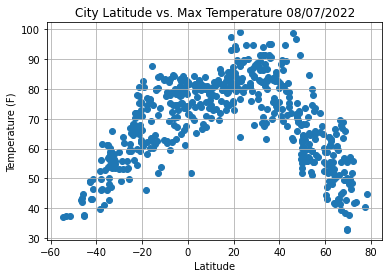

In [12]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('../output_data/City Latitude vs. Max Temperature.png')

# Show plot
plt.show()

In [13]:
#Latitude vs. Humidity Plot

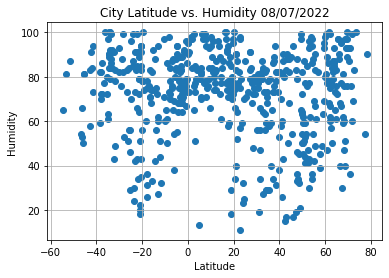

In [14]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('../output_data//City Latitude vs. Humidity.png')

# Show plot
plt.show()

In [15]:
#Latitude vs. Cloudiness Plot

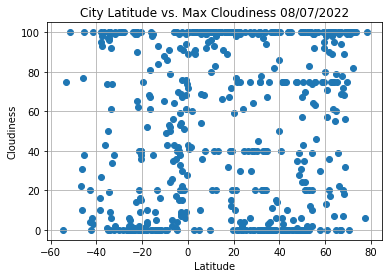

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('../output_data/City Latitude vs. Cloudiness.png')

# Show plot
plt.show()

In [17]:
#Latitude vs. Wind Speed Plot

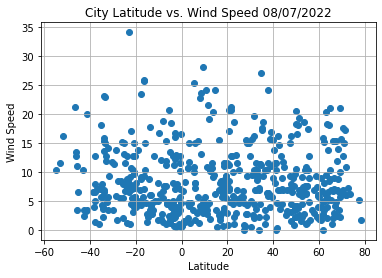

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig('../output_data//City Latitude vs. Wind Speed.png')

# Show plot
plt.show()